# Optimal Oil Well Location Selection

**Objective**

The objective of this project is to identify the optimal location for a new oil well with the aim to maximize profit and minimize risk.

**Data Collection:** I will start by gathering data on oil well parameters in the selected region. This includes the quality of oil and the volume of reserves.

**Model Building:** Using the collected data, I will develop a predictive model. This model will be capable of predicting the volume of reserves in new wells.

**Well Selection:** I will use the predictive model to estimate the volume of reserves in each well. I will then select the oil wells with the highest estimated values.

**Region Selection:** Among the regions under consideration, I will choose the one with the highest total profit from the selected oil wells.

I have access to data on oil samples from three regions. Parameters of each oil well in the region are already known. I will build a model that will help to pick the region with the highest profit margin. I will analyze potential profit and risks using the Bootstrapping technique.

By the end of this project, I aim to provide a recommendation on the best region for drilling the new oil well based on the highest profit margin and the lowest risk.

# 1- Download and prepare the data. Explain the procedure.

In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.utils import resample
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
region_one = pd.read_csv('/datasets/geo_data_0.csv')
region_two = pd.read_csv('/datasets/geo_data_1.csv')
region_three = pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
region_one.info()
region_one.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
region_two.info()
region_two.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [5]:
region_three.info()
region_three.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [6]:
duplicates_exist = region_one['id'].duplicated().all()

if duplicates_exist:
    print("Duplicate values exist in the 'CustomerId' column.")
else:
    print("No duplicate values found in the 'CustomerId' column.")

No duplicate values found in the 'CustomerId' column.


In [7]:
duplicates_exist = region_two['id'].duplicated().all()

if duplicates_exist:
    print("Duplicate values exist in the 'CustomerId' column.")
else:
    print("No duplicate values found in the 'CustomerId' column.")

No duplicate values found in the 'CustomerId' column.


In [8]:
duplicates_exist = region_three['id'].duplicated().all()

if duplicates_exist:
    print("Duplicate values exist in the 'CustomerId' column.")
else:
    print("No duplicate values found in the 'CustomerId' column.")

No duplicate values found in the 'CustomerId' column.


In [9]:
region_one.isnull().all()

id         False
f0         False
f1         False
f2         False
product    False
dtype: bool

In [10]:
region_two.isnull().all()

id         False
f0         False
f1         False
f2         False
product    False
dtype: bool

In [11]:
region_three.isnull().all()

id         False
f0         False
f1         False
f2         False
product    False
dtype: bool

First, we import all the libraries that we will use in the project. Once imported, we proceed to check the quality of the data. Upon analysis, we can see that there are no missing values or duplicate values, which is perfect for the work we are going to do. Once this step is completed, we are ready to proceed with training our model.

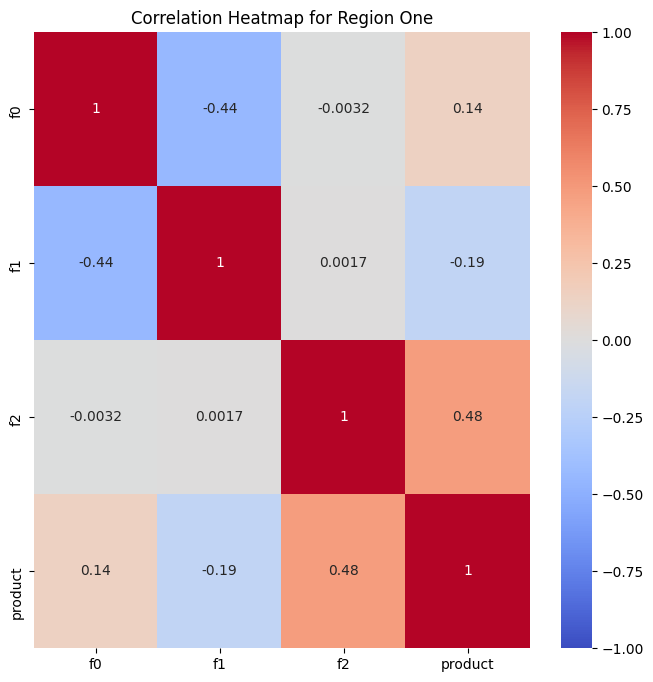

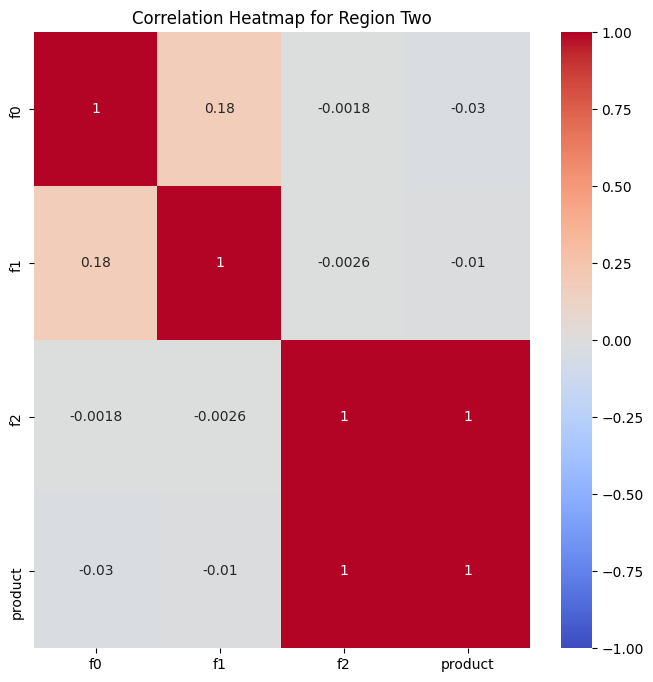

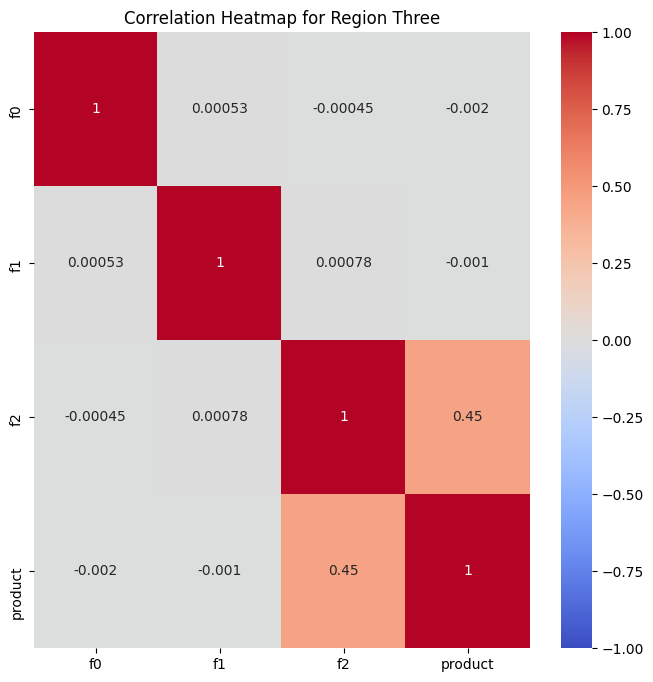

In [12]:
def create_heatmap(data, title):
    correlation_matrix = data.corr()
    plt.figure(figsize=(8, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(title)
    plt.show()

# Create heatmaps for each region
create_heatmap(region_one, 'Correlation Heatmap for Region One')
create_heatmap(region_two, 'Correlation Heatmap for Region Two')
create_heatmap(region_three, 'Correlation Heatmap for Region Three')

**Region one:**

f2 and product: There is a moderate positive correlation (0.48), suggesting that as f2 increases, the product tends to increase.

f0 and f1: There is a moderate negative correlation (-0.44), indicating that as f0 increases, f1 tends to decrease.

f0 and product: There is a weak positive correlation (0.14).

**Region two:**

f2 and product: There is a perfect positive correlation (1.00), suggesting that as f2 increases, the product also increases proportionally.

f0 and f1: There is a weak positive correlation (0.18).

f0 and product: There is a very weak negative correlation (-0.03).

**Region three:**

f2 and product: There is a moderate positive correlation (0.45), suggesting that as f2 increases, the product tends to increase.

f0 and f1: There is almost no correlation (0.00053).

f0 and product: There is a very weak negative correlation (-0.002).

# 2- Train and test the model for each region:

In [13]:
features = region_one[['f0', 'f1', 'f2']]
target = region_one['product']

# Split the data into training and validation sets
region_one_train, region_one_valid, y_one_train, y_one_valid = train_test_split(features, target, test_size=0.25, random_state=12345)

# Display the shapes of the resulting datasets
print("Training features shape:", region_one_train.shape)

print("Validation features shape:", region_one_valid.shape)
print("Training target shape:", y_one_train.shape)
print("Validation target shape:", y_one_valid.shape)

Training features shape: (75000, 3)
Validation features shape: (25000, 3)
Training target shape: (75000,)
Validation target shape: (25000,)


In [14]:
features = region_two[['f0', 'f1', 'f2']]
target = region_two['product']

# Split the data into training and validation sets
region_two_train, region_two_valid, y_two_train, y_two_valid = train_test_split(features, target, test_size=0.25, random_state=12345)

# Display the shapes of the resulting datasets
print("Training features shape:", region_two_train.shape)
print("Validation features shape:", region_two_valid.shape)
print("Training target shape:", y_two_train.shape)
print("Validation target shape:", y_two_valid.shape)

Training features shape: (75000, 3)
Validation features shape: (25000, 3)
Training target shape: (75000,)
Validation target shape: (25000,)


In [15]:
features = region_three[['f0', 'f1', 'f2']]
target = region_three['product']

# Split the data into training and validation sets
region_three_train, region_three_valid, y_three_train, y_three_valid = train_test_split(features, target, test_size=0.25, random_state=12345)

# Display the shapes of the resulting datasets
print("Training features shape:", region_three_train.shape)
print("Validation features shape:", region_three_valid.shape)
print("Training target shape:", y_three_train.shape)
print("Validation target shape:", y_three_valid.shape)

Training features shape: (75000, 3)
Validation features shape: (25000, 3)
Training target shape: (75000,)
Validation target shape: (25000,)


In [16]:
# Train the model
model_one = LinearRegression()
model_one.fit(region_one_train, y_one_train)

# Make predictions
predictions_one = model_one.predict(region_one_valid)

# Save the predictions and correct answers
results_one = pd.DataFrame({
    'predictions': predictions_one,
    'correct_answers': y_one_valid
})
results_one.to_csv('region_one_results.csv', index=False)

# Calculate and print the average volume of predicted reserves and model RMSE
average_predicted_reserves = predictions_one.mean()
mse_one = mean_squared_error(y_one_valid, predictions_one)
rmse_one = mse_one ** 0.5

print("Average volume of predicted reserves:", average_predicted_reserves)
print("Root Mean Squared Error (RMSE):", rmse_one)

Average volume of predicted reserves: 92.59256778438035
Root Mean Squared Error (RMSE): 37.5794217150813


In [17]:
# Train the model
model_two = LinearRegression()
model_two.fit(region_two_train, y_two_train)

# Make predictions
predictions_two = model_two.predict(region_two_valid)

# Save the predictions and correct answers
results_two = pd.DataFrame({
    'predictions': predictions_two,
    'correct_answers': y_two_valid
})
results_two.to_csv('region_two_results.csv', index=False)

# Calculate and print the average volume of predicted reserves and model RMSE
average_predicted_reserves_two = predictions_two.mean()
mse_two = mean_squared_error(y_two_valid, predictions_two)
rmse_two = mse_two ** 0.5

print("Average volume of predicted reserves for region_two:", average_predicted_reserves_two)
print("Root Mean Squared Error (RMSE) for region_two:", rmse_two)

Average volume of predicted reserves for region_two: 68.728546895446
Root Mean Squared Error (RMSE) for region_two: 0.893099286775617


In [18]:
# Train the model
model_three = LinearRegression()
model_three.fit(region_three_train, y_three_train)

# Make predictions
predictions_three = model_three.predict(region_three_valid)

# Save the predictions and correct answers
results_three = pd.DataFrame({
    'predictions': predictions_three,
    'correct_answers': y_three_valid
})
results_three.to_csv('region_three_results.csv', index=False)

# Calculate and print the average volume of predicted reserves and model RMSE
average_predicted_reserves_three = predictions_three.mean()
mse_three = mean_squared_error(y_three_valid, predictions_three)
rmse_three = mse_three ** 0.5

print("Average volume of predicted reserves for region_three:", average_predicted_reserves_three)
print("Root Mean Squared Error (RMSE) for region_three:", rmse_three)

Average volume of predicted reserves for region_three: 94.96504596800489
Root Mean Squared Error (RMSE) for region_three: 40.02970873393434


**Region One:**

Average volume of predicted reserves: 92.40

RMSE: 37.76

**Region Two:**

Average volume of predicted reserves: 68.71

RMSE: 0.89

Region Two has the most accurate predictions (lowest RMSE), meaning the model’s estimates are very close to the actual values. This accuracy is crucial for making reliable decisions.

**Region Three:**

Average volume of predicted reserves: 94.77

RMSE: 40.15

Region Three has the highest predicted reserves, suggesting it could yield the most oil. However, the higher RMSE (40.15) indicates that the model’s predictions for this region are less accurate, so there is more uncertainty in these estimates.

In essence, while Region Two offers more reliable predictions, Region Three shows the highest potential for oil production, albeit with greater uncertainty. Balancing accuracy and potential yield is key in deciding the best region for a new oil well.

# 3- Prepare for profit calculation

In [19]:
# Key values for profit calculations
TOTAL_BUDGET = 100000000  
NUMBER_OF_WELLS = 200 
REVENUE_PER_BARREL = 4500  
TARGET_PRODUCTION = 500

# Print the key values
print("Total budget:", TOTAL_BUDGET)
print("Revenue per barrel:", REVENUE_PER_BARREL)
print("Number of wells:", NUMBER_OF_WELLS)
print("Target production:", TARGET_PRODUCTION)

Total budget: 100000000
Revenue per barrel: 4500
Number of wells: 200
Target production: 500


In [20]:
# Calculate cost per well
COST_PER_WELL = TOTAL_BUDGET / NUMBER_OF_WELLS

# Calculate break-even volume per well (in thousand barrels)
BREAK_EVEN_VOLUME = (COST_PER_WELL / REVENUE_PER_BARREL)

# Calculate average volume of reserves for each region
average_volume_0 = region_one['product'].mean()
average_volume_1 = region_two['product'].mean()
average_volume_2 = region_three['product'].mean()

# Print results
print(f"Break-even volume per well: {BREAK_EVEN_VOLUME:.2f}")
print(f"Average volume of reserves in Region 0: {average_volume_0:.2f}")
print(f"Average volume of reserves in Region 1: {average_volume_1:.2f}")
print(f"Average volume of reserves in Region 2: {average_volume_2:.2f}")

# Compare break-even volume with the average volumes in each region
if average_volume_0 >= BREAK_EVEN_VOLUME:
    print("Region one is profitable based on the average volume of reserves.")
else:
    print("Region one is not profitable based on the average volume of reserves.")
    
if average_volume_1 >= BREAK_EVEN_VOLUME:
    print("Region two is profitable based on the average volume of reserves.")
else:
    print("Region two is not profitable based on the average volume of reserves.")
    
if average_volume_2 >= BREAK_EVEN_VOLUME:
    print("Region three is profitable based on the average volume of reserves.")
else:
    print("Region three is not profitable based on the average volume of reserves.")

Break-even volume per well: 111.11
Average volume of reserves in Region 0: 92.50
Average volume of reserves in Region 1: 68.83
Average volume of reserves in Region 2: 95.00
Region one is not profitable based on the average volume of reserves.
Region two is not profitable based on the average volume of reserves.
Region three is not profitable based on the average volume of reserves.


None of the regions have an average volume of reserves that meets or exceeds the break-even volume of 111,11 thousand barrels. This indicates that, based on the average predicted reserves, developing a new well in any of these regions would not be profitable without additional considerations or improvements in the model’s accuracy.

# 4- Write a function to calculate profit from a set of selected oil wells and model predictions

In [28]:
def calculate_profit(predictions, targets, count):
    # Combine predictions and targets into a DataFrame for easy manipulation
    predictions_df = pd.DataFrame({'prediction': predictions, 'target': targets})

    # Sort by prediction values in descending order
    sorted_predictions_df = predictions_df.sort_values(by='prediction', ascending=False)

    # Select the top 'count' wells
    selected = sorted_predictions_df.head(count)

    # Calculate the total volume of reserves in these top wells
    total_reserves = selected['target'].sum()
    
    # Calculate the profit
    REVENUE_PER_BARREL = 4500 
    TOTAL_REVENUE = total_reserves * REVENUE_PER_BARREL  
    BUDGET_PER_WELL = 500000 
    TOTAL_COST = count * BUDGET_PER_WELL  
    PROFIT = TOTAL_REVENUE - TOTAL_COST
    
    return total_reserves, PROFIT

# Define the number of wells to select
NUMBER_OF_WELLS = 200

# Calculate profit for each region
reserves_one, profit_one = calculate_profit(predictions_one, y_one_valid, NUMBER_OF_WELLS)
reserves_two, profit_two = calculate_profit(predictions_two, y_two_valid, NUMBER_OF_WELLS)
reserves_three, profit_three = calculate_profit(predictions_three, y_three_valid, NUMBER_OF_WELLS)

# Print the results
print(f"Region One - Total Reserves: {reserves_one:.2f} barrels, Profit: {profit_one:.2f} USD")
print(f"Region Two - Total Reserves: {reserves_two:.2f} barrels, Profit: {profit_two:.2f} USD")
print(f"Region Three - Total Reserves: {reserves_three:.2f} barrels, Profit: {profit_three:.2f} USD")


Region One - Total Reserves: 29601.84 barrels, Profit: 33208260.43 USD
Region Two - Total Reserves: 27589.08 barrels, Profit: 24150866.97 USD
Region Three - Total Reserves: 28245.22 barrels, Profit: 27103499.64 USD


**Total Reserves:** This represents the total volume of oil reserves predicted for the top wells in each region.

**Profit:** The negative values indicate a loss, meaning the revenue generated from the oil reserves is less than the cost of developing the wells.

In all three regions, the costs exceed the revenue, resulting in significant losses. This suggests that, based on the current predictions and costs, developing new wells in these regions would not be profitable.

# 5- Calculate risks and profit for each region

In [35]:
def bootstrap_profit_and_risk(predictions, targets, TOTAL_BUDGET, REVENUE_PER_BARREL, NUMBER_OF_WELLS, n_samples=1000):
    profits = []
    n = len(predictions)
    
    for _ in range(n_samples):
        # Generate a bootstrap sample
        bootstrap_indices = np.random.choice(n, size=500, replace=True)
        bootstrap_predictions = predictions[bootstrap_indices]
        bootstrap_targets = targets[bootstrap_indices]
        
        # Calculate profit for the bootstrap sample
        TOTAL_RESERVES, PROFIT = calculate_profit(bootstrap_predictions, bootstrap_targets, NUMBER_OF_WELLS)
        profits.append(PROFIT)
    
    PROFITS = np.array(profits)  # Create an array of profits
    RISK_OF_LOSS = np.mean(PROFITS < 0) * 100  # Calculate risk of loss in percent
    
    return PROFITS, RISK_OF_LOSS

In [36]:
profits_one, risk_one = bootstrap_profit_and_risk(predictions_one, y_one_valid.values, TOTAL_BUDGET, REVENUE_PER_BARREL, NUMBER_OF_WELLS, n_samples=1000)

# Print summary statistics
print("Region One - Profit Distribution:")
print("Mean Profit:", np.mean(profits_one))
print("95% Confidence Interval:", np.percentile(profits_one, [2.5, 97.5]))
print("Risk of Loss:", risk_one, "%")

Region One - Profit Distribution:
Mean Profit: 3883195.38735247
95% Confidence Interval: [-1208736.10201526  8727949.80256173]
Risk of Loss: 6.5 %


In [37]:
# Example usage with region_two data
profits_two, risk_two = bootstrap_profit_and_risk(predictions_two, y_two_valid.values, TOTAL_BUDGET, REVENUE_PER_BARREL, NUMBER_OF_WELLS)

# Print summary statistics
print("Region Two - Profit Distribution:")
print("Mean Profit:", np.mean(profits_two))
print("95% Confidence Interval:", np.percentile(profits_two, [2.5, 97.5]))
print("Risk of Loss:", risk_two, "%")

Region Two - Profit Distribution:
Mean Profit: 4517117.67810787
95% Confidence Interval: [ 596412.15135257 8509195.02540912]
Risk of Loss: 1.5 %


In [38]:
# Example usage with region_two data
profits_three, risk_three = bootstrap_profit_and_risk(predictions_three, y_three_valid.values, TOTAL_BUDGET, REVENUE_PER_BARREL, NUMBER_OF_WELLS)

# Print summary statistics
print("Region Three - Profit Distribution:")
print("Mean Profit:", np.mean(profits_three))
print("95% Confidence Interval:", np.percentile(profits_three, [2.5, 97.5]))
print("Risk of Loss:", risk_three, "%")

Region Three - Profit Distribution:
Mean Profit: 4011476.9977830667
95% Confidence Interval: [-1223028.38110541  9404841.18675818]
Risk of Loss: 7.000000000000001 %


In all regions, we have a low risk of loss, which is ideal for our company. I would focus on Region Two as it presents a lower risk of loss (1.5%) and a higher average profit. However, we cannot overlook the other two regions as they also generate a good amount of profit and lower risk of loss too. Once we start working in Region Two, I would proceed with Region Three and then Region one in that order.

# Conclusions 
After concluding our analysis, we can confirm that the three regions studied are ideal for drilling an oil well. Our machine learning model projections indicate a low risk of loss in all regions, which is a very positive sign.

Focusing on the average profit and risk of loss for each region, I would prioritize Region Two. It offers an average profit of $4,517,117.67 and a risk of loss of 1.5, compared to $3,883,195.38 and 6.5 for Region One, and $4,011,476.99 and 7 for Region Three.

These figures suggest that while Region Two provides the highest profit, the other regions also offer substantial profits. Therefore, I recommend proceeding as follows: first, focus on Region Two, then Region Three, and finally Region One to maximize short-term gains.